# USED CARS

- This dataset holds over 100,000 records about used cars
- We will look for patterns and how different factors impact the vehicles price

Setting up our dataset in Jupyter

In [1]:
# import everything

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# gather datsets and combine into one

ford = pd.read_csv("cars/ford.csv")
ford.insert(0, 'make', 'Ford')

vw = pd.read_csv("cars/vw.csv")
vw.insert(0, 'make', 'VW')

merc = pd.read_csv("cars/merc.csv")
merc.insert(0, 'make', 'Mercedes')

vauxhall = pd.read_csv("cars/vauxhall.csv")
vauxhall.insert(0, 'make', 'Vauxhall')

bmw = pd.read_csv("cars/bmw.csv")
bmw.insert(0, 'make', 'BMW')

audi = pd.read_csv("cars/audi.csv")
audi.insert(0, 'make', 'Audi')

toyota = pd.read_csv("cars/toyota.csv")
toyota.insert(0, 'make', 'Toyota')

skoda = pd.read_csv("cars/skoda.csv")
skoda.insert(0, 'make', 'Skoda')

hyundai = pd.read_csv("cars/hyundi.csv")
hyundai.insert(0, 'make', 'Hyundai')

cars = pd.concat([ford, vw, merc, vauxhall, bmw, audi, toyota, skoda, hyundai], axis=0)

In [3]:
# clean up the new dataset

cars['model'] = cars['model'].str.strip()
cars = cars[cars['year'] <= 2022]
cars['age'] = (2022 - cars['year'])
cars = cars.reset_index(drop=True)

# Popular makes and models

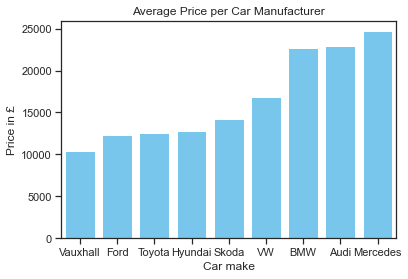

In [31]:
avg_price_per_make = pd.Series(cars.groupby('make')['price'].mean())
avg_price_per_make = avg_price_per_make.sort_values()

g = sns.barplot(data=avg_price_per_make, x=avg_price_per_make.index, y=avg_price_per_make.values, color="#66CCFF")

g.set(xticklabels=avg_price_per_make.index)
plt.xlabel("Car make")
plt.ylabel("Price in £")
plt.title('Average Price per Car Manufacturer')
plt.show()

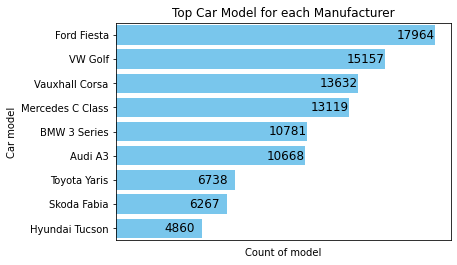

In [4]:
# Generate 2 series with columns we need
pop_c = cars.groupby('make')[['model']].agg(pd.Series.count)
pop_m = cars.groupby('make')[['model']].agg(pd.Series.mode)

# Join the 2 series together and clean the resulting dataframe
popular = pd.merge(pop_m, pop_c, right_index=True, left_index=True)
popular.rename(columns={'model_x':'model', 'model_y':"count"}, inplace=True)
popular['full'] = popular.index + ' ' + popular['model']
popular = popular.sort_values(by='count', ascending=False)

# Plot the graph
g = sns.barplot(data=popular, x='count', y='full', color="#66CCFF")
g.bar_label(g.containers[0], padding=-38, fontsize=12)
g.axes.xaxis.set_ticks([])

plt.title('Top Car Model for each Manufacturer')
plt.xlabel('Count of model')
plt.ylabel('Car model')
plt.show()

Here we see the average price for each car manufacturer in the dataset, don't forget these are used car prices.
We can see the cheapest brand is Vauxhall and Audi and Mercedes are at the top end being more premium brands, this is what was expected.

The second graph shows the most popular car model for each manufacturer by count. 

# Engine efficiency

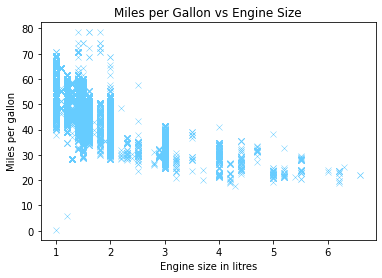

In [5]:
filt = cars[(cars['mpg'] < 80) & (cars['engineSize'] > 0)]
filt = filt[filt['fuelType'].isin(['Petrol', 'Deisel'])]
sns.scatterplot(data=filt, x='engineSize', y='mpg', marker='x', color="#66CCFF")

plt.xlabel('Engine size in litres')
plt.ylabel('Miles per gallon')
plt.title("Miles per Gallon vs Engine Size")
plt.show()

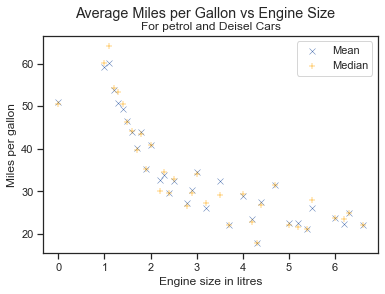

In [32]:
filt = cars[cars['fuelType'].isin(['Petrol', 'Deisel'])]
mean_mpg = filt.groupby('engineSize')[['engineSize', 'mpg']].mean()
med_mpg = filt.groupby('engineSize')[['engineSize', 'mpg']].median()#.agg(pd.Series.mode)

sns.scatterplot(data=mean_mpg, x='engineSize', y='mpg', marker='x')
sns.scatterplot(data=med_mpg, x='engineSize', y='mpg', marker='+', color='orange')

plt.legend(labels=['Mean', 'Median'])
plt.xlabel('Engine size in litres')
plt.ylabel('Miles per gallon')
plt.suptitle("Average Miles per Gallon vs Engine Size")
plt.title("For petrol and Deisel Cars")
plt.show()

The first graph plots each individual record, it shows the relationship between miles per gallon and engine size. 
The second shows median and mean values for each engine size.
They both clearly depict that as the engine size increases, mpg decreases.
On the second graph there is a tight correlation for smaller engines which becomes more spread as engine size increases. 

# Effects of age and mileage on price

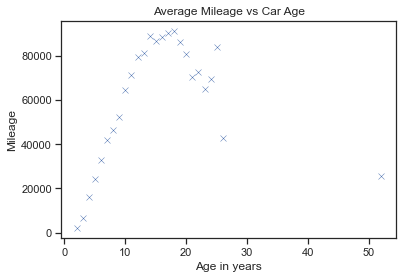

In [39]:
filt = cars.groupby('age')[['age', 'mileage']].mean()

sns.scatterplot(data=filt, x='age', y='mileage', marker='x')
plt.ylabel("Mileage")
plt.xlabel('Age in years')
plt.title('Average Mileage vs Car Age')
plt.show()

This graph initially shows that as a car ages its mileage increases on average. This is quite obvious as mileage is a cumulative figure so can't go down. The graph seems to contradict this as at around 18 years it appears to show the average mileage decrease. This is likely due to cars having a higher mileage are scrapped due to breaking down or for being worth more as scrap metal. Having these higher mileage cars removed means the average mileage for cars begins to fall at around the 20 year mark.  

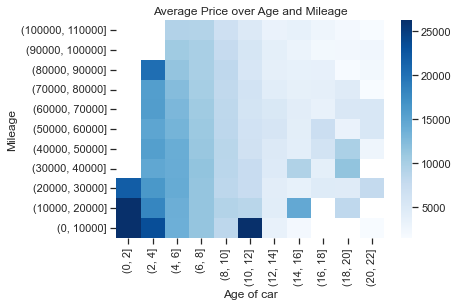

In [37]:
cars['m_binned'] = pd.cut(cars['mileage'], bins=list(range(0, 120000, 10000)))
cars['a_binned'] = pd.cut(cars['age'], bins=list(range(0, 24, 2)))

cars_pivot = cars.pivot_table(
        values='price', 
        index='m_binned', 
        columns='a_binned', 
        aggfunc=np.mean)
cars_pivot.sort_index(ascending=False, inplace=True)


sns.heatmap(cars_pivot, robust=True, cmap="Blues")

plt.ylabel('Mileage')
plt.xlabel('Age of car')
plt.title('Average Price over Age and Mileage')
plt.show()

We can see a clear and expected relationship showing as age and mileage increases the price decreases.
However, if we look deeper we can see that there are some verticle lines. These show that for younger cars the age has more of an impact on price than milegae.
On the other end, when the car is older we can see mileage has a bigger impact on price than age does, this is seen with the horizontal lines on the heatmap.
Obviously there is a vast range of vehicles in the dataset so we're not necessarily comparing apples with apples.

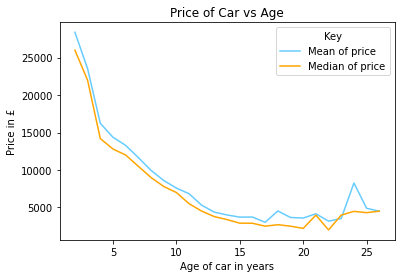

In [14]:
grp = cars[cars['age'] < 30]
mean_price = grp.groupby('age')[['age', 'price']].mean()
med_price = grp.groupby('age')[['age', 'price']].median()

mean_price['Key'] = 'Mean of price'
med_price['Key'] = 'Median of price'

sns.lineplot(data=mean_price, x='age', y='price', hue='Key', palette=["#66CCFF"])
sns.lineplot(data=med_price, x='age', y='price', hue='Key', palette=['orange'])

plt.xlabel('Age of car in years')
plt.ylabel('Price in £')
plt.title('Price of Car vs Age')
plt.show()

We can see that as the age increases the price deacreses on average. There is a sharp decline in the first 2-3 years which slows down until around 13 years where it flattens off before starting to rise slightly. This rise in price could be due to classic cars pulling the average up. Cheaper, unwanted cars will be scrapped leaving only the lower mileage or more premium cars to drive up the average price. This rise in average price could be the classic cars appreciating, or it could be the lower priced cars no longer being a part of the average.

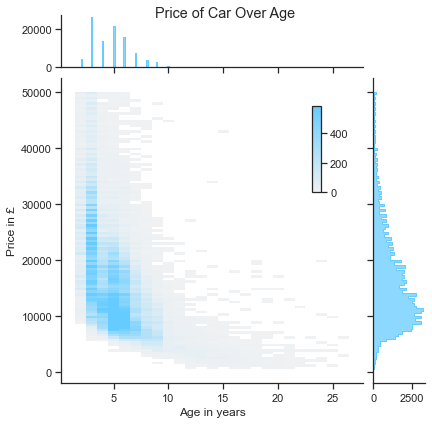

In [38]:
age_price = cars[(cars['price'] < 50000) & (cars['age'] < 30)]

sns.set_theme(style="ticks")

g = sns.JointGrid(data=age_price, x="age", y="price", marginal_ticks=True)


# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.7, .55, .02, .2])


# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#66CCFF", pmax=.8, cbar=True, cbar_ax=cax
)

g.plot_marginals(sns.histplot, element="step", color="#66CCFF")

plt.suptitle('Price of Car Over Age')
g.ax_joint.set_xlabel('Age in years')
g.ax_joint.set_ylabel('Price in £')
plt.show()

This plot shows the density of cars and their relationship between price and age. We can see that most cars in this dataset are aged between 3 and 7 years and the most common prices are around £5,000-£20,000. This likely reflects the whole of the UK.
The graph also shows how quickly the price decreases as the age increases.

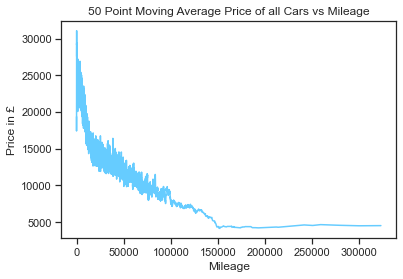

In [18]:
grp = cars.groupby('mileage')[['mileage', 'price']].mean()
grp['price'] = grp['price'].rolling(window=50, min_periods=1).mean()


sns.lineplot(data=grp, x='mileage', y='price', color="#66CCFF")

plt.title('50 Point Moving Average Price of all Cars vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price in £')
plt.show()

Here we can see how mileage affects the average price of the cars. There is a sharp decline for the first 25,000 miles which tapers off up to 150,000 miles aftwer which the average price remains fairly flat. This relationship where a higher mileage drives down the price was expected.

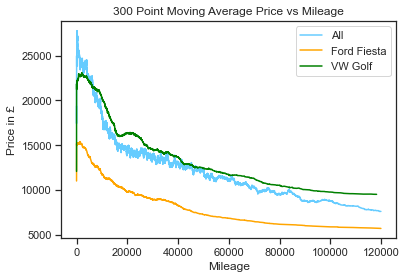

In [20]:
avg_width = 300
max_miles = 120000

grp = cars[cars['mileage'] < max_miles]
grp = grp.groupby('mileage')[['mileage', 'price']].mean()
grp['price'] = grp['price'].rolling(window=avg_width, min_periods=1).mean()

sns.lineplot(data=grp, x='mileage', y='price', color="#66CCFF")



grp = cars[(cars['model'] == 'Fiesta') & (cars['mileage'] < max_miles)]
grp = grp.groupby('mileage')[['mileage', 'price']].mean()
grp['price'] = grp['price'].rolling(window=avg_width, min_periods=1).mean()

sns.lineplot(data=grp, x='mileage', y='price', color="orange")



grp = cars[(cars['model'] == 'Golf') & (cars['mileage'] < max_miles)]
grp = grp.groupby('mileage')[['mileage', 'price']].mean()
grp['price'] = grp['price'].rolling(window=avg_width, min_periods=1).mean()

sns.lineplot(data=grp, x='mileage', y='price', color="green")


plt.legend(labels=['All', 'Ford Fiesta', 'VW Golf'])
plt.title(str(avg_width) + ' Point Moving Average Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price in £')
plt.show()

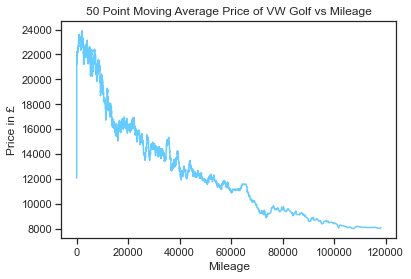

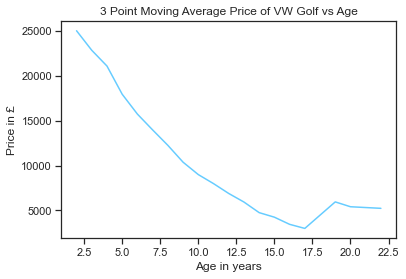

In [21]:
grp = cars[(cars['model'] == 'Golf') & (cars['mileage'] < 120000)]
grp = grp.groupby('mileage')[['mileage', 'price']].mean()
grp['price'] = grp['price'].rolling(window=50, min_periods=1).mean()


sns.lineplot(data=grp, x='mileage', y='price', color="#66CCFF")

plt.title('50 Point Moving Average Price of VW Golf vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price in £')
plt.show()



grp = cars[(cars['model'] == 'Golf') & (cars['mileage'] < 120000)]
grp = grp.groupby('age')[['age', 'price']].mean()
grp['price'] = grp['price'].rolling(window=3, min_periods=1).mean()

sns.lineplot(data=grp, x='age', y='price', color="#66CCFF")

plt.title('3 Point Moving Average Price of VW Golf vs Age')
plt.xlabel('Age in years')
plt.ylabel('Price in £')
plt.show()

# Effect the transmission type has on price

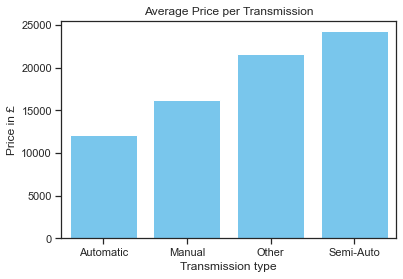

In [23]:
avg_price_tr = pd.Series(cars.groupby('transmission')['price'].mean())

g = sns.barplot(data=avg_price_tr, x=avg_price_tr.index, y=avg_price_tr.values, color="#66CCFF")

g.set(xticklabels=avg_price_tr.index)
plt.xlabel("Transmission type")
plt.ylabel("Price in £")
plt.title('Average Price per Transmission')
plt.show()

It is expected that semi-auto transmission vehicles have a higher price on average as this transmission type is common in sporty cars which carry a premium price point. The unexpected result is the average price of automatic cars is lower than that of manual cars, something I had always known to be the other way around.

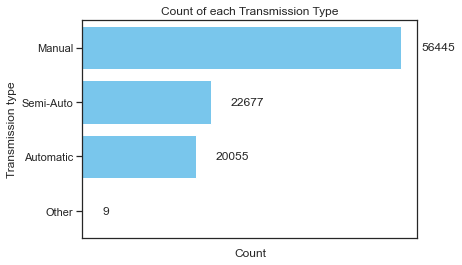

In [25]:
trans_count = cars.groupby('transmission')[['transmission']].agg(pd.Series.count)

trans_count = trans_count.rename_axis('transmission_type')
trans_count = trans_count.sort_values(by='transmission', ascending=False)
trans_count


g = sns.barplot(data=trans_count, x='transmission', y=trans_count.index, color="#66CCFF")
g.bar_label(g.containers[0], padding=20, fontsize=12)
g.axes.xaxis.set_ticks([])

plt.title('Count of each Transmission Type')
plt.xlabel('Count')
plt.ylabel('Transmission type')
plt.show()

First, I looked at the count of each type within the dataset, this was to ensure there was a big enough sample of automatic cars to prevent a few outliers from skewing the average price.

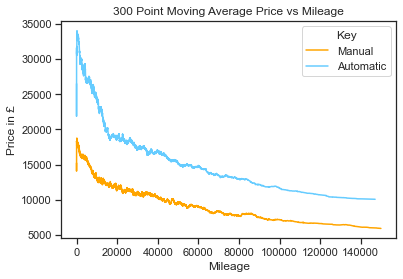

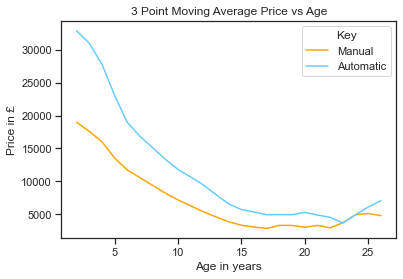

In [26]:
manu = cars[(cars['transmission'] == 'Manual') & (cars['mileage'] < 150000) & (cars['age'] < 30)]
auto = cars[(cars['transmission'] == 'Automatic') & (cars['mileage'] < 150000) & (cars['age'] < 30)]



m_grp = manu.groupby('mileage')[['mileage', 'price']].mean()
m_grp['price'] = m_grp['price'].rolling(window=300, min_periods=1).mean()

a_grp = auto.groupby('mileage')[['mileage', 'price']].mean()
a_grp['price'] = a_grp['price'].rolling(window=300, min_periods=1).mean()

m_grp['Key'] = 'Manual'
a_grp['Key'] = 'Automatic'

sns.lineplot(data=m_grp, x='mileage', y='price', palette=["orange"], hue='Key')
sns.lineplot(data=a_grp, x='mileage', y='price', palette=["#66CCFF"], hue='Key')



plt.title('300 Point Moving Average Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price in £')
plt.show()



m_grp = manu.groupby('age')[['age', 'price']].mean()
m_grp['price'] = m_grp['price'].rolling(window=3, min_periods=1).mean()

a_grp = auto.groupby('age')[['age', 'price']].mean()
a_grp['price'] = a_grp['price'].rolling(window=3, min_periods=1).mean()

m_grp['Key'] = 'Manual'
a_grp['Key'] = 'Automatic'

sns.lineplot(data=m_grp, x='age', y='price', palette=["orange"], hue='Key')
sns.lineplot(data=a_grp, x='age', y='price', palette=["#66CCFF"], hue='Key')



plt.title('3 Point Moving Average Price vs Age')
plt.xlabel('Age in years')
plt.ylabel('Price in £')
plt.show()

Next I looked at how the average prices of both manual and automatic vehicles change as they ages and gain mileage. The graphs appear to show the opposite of the initial bar chart. The average price of automatic cars remains higher than that of manual cars.

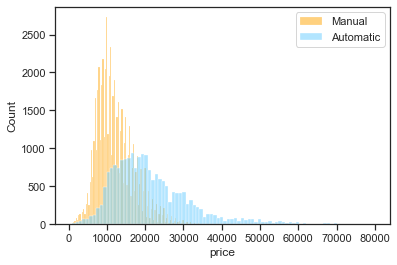

In [28]:
l_manu = manu[manu['price'] < 80000]
l_auto = auto[auto['price'] < 80000]

sns.histplot(data=l_manu, x='price', alpha=0.5, color="orange")
sns.histplot(data=l_auto, x='price', alpha=0.5, color='#66CCFF')

plt.legend(labels=['Manual', 'Automatic'])

plt.show()

The next idea was to look at the frequency of each price point for both transmission types, this is because there could be a large number of cheap automatic cars pulling the overall average down or lots of expenive manual cars pulling it's average up. The histogram doesn't show this, in fact it seems to show manual cars should be cheaper than automatic on average.

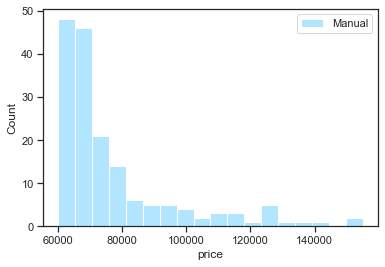

In [40]:
h_manu = manu[manu['price'] > 60000]
h_auto = auto[auto['price'] > 60000]

sns.histplot(data=h_manu, x='price', alpha=0.5, color="orange")
sns.histplot(data=h_auto, x='price', alpha=0.5, color='#66CCFF')

plt.legend(labels=['Manual', 'Automatic'])

plt.show()

I decided to plot the same histogram but filter out all cars cheaper than £60,000. This is because there could have been one outlier in the dataset such as a manual car worth £10,000,000 which would pull it's average up. This isn't the case, in fact the manual plot doesn't even appear in the legend as there are no manual cars in the dataset worth more than £60,000.

# To conclude
- We can clearly see that cars with bigger engines are less economical however this doesn't take the body tpe or weight of the vehicle into account
- We can also see that age and price drive down vehicle prices
- Finally there is conflicting data showing both that manual cars are more expensive on average than automatic cars and also that they are cheaper than automatic cars. This is something to look into in future.